In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# import os

from tensorflow import keras
from tensorflow.python.keras import layers
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator

from tensorflow.python.keras.callbacks import EarlyStopping, ReduceLROnPlateau,ModelCheckpoint

from pathlib import Path
# from glob import glob

from utils import *

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
by_merge_map = {0:'0', 1:'1', 2:'2', 3:'3', 4:'4', 5:'5', 6:'6', 7:'7', 8:'8', 9:'9', 10:'A', 11:'B', 12:'C', 13:'D', 14:'E', 15:'F', 16:'G', 17:'H', 18:'I', 19:'J', 20:'K', 21:'L', 22:'M', 23:'N', 24:'O', 25:'P', 26:'Q', 27:'R', 28:'S', 29:'T', 30:'U', 31:'V', 32:'W', 33:'X', 34:'Y', 35:'Z', 36:'a', 37:'b', 38:'d', 39:'e', 40:'f', 41:'g', 42:'h', 43:'n', 44:'q', 45:'r', 46:'t'}
by_merge_map_new = {}
poplist = []

for k in by_merge_map.keys():
    if k >= 10 and k <= 35:
        by_merge_map_new[k-10] = by_merge_map[k]
        
root_path, data_path = get_root_path('mnist_portfolio')

paths = data_path.glob('*.csv')

In [4]:
lower = 10
upper = 35

for p in paths:
    if 'Rensade' in str(p):
        x_train, y_train = gen_sets(p)
x_train[x_train < 150] = 0
y_train = y_train - 10

In [5]:
pic_no = 1
def fix_image(image, plot=False):
    pic = trim_img(image)
    
    return square_pick(pic, plot)


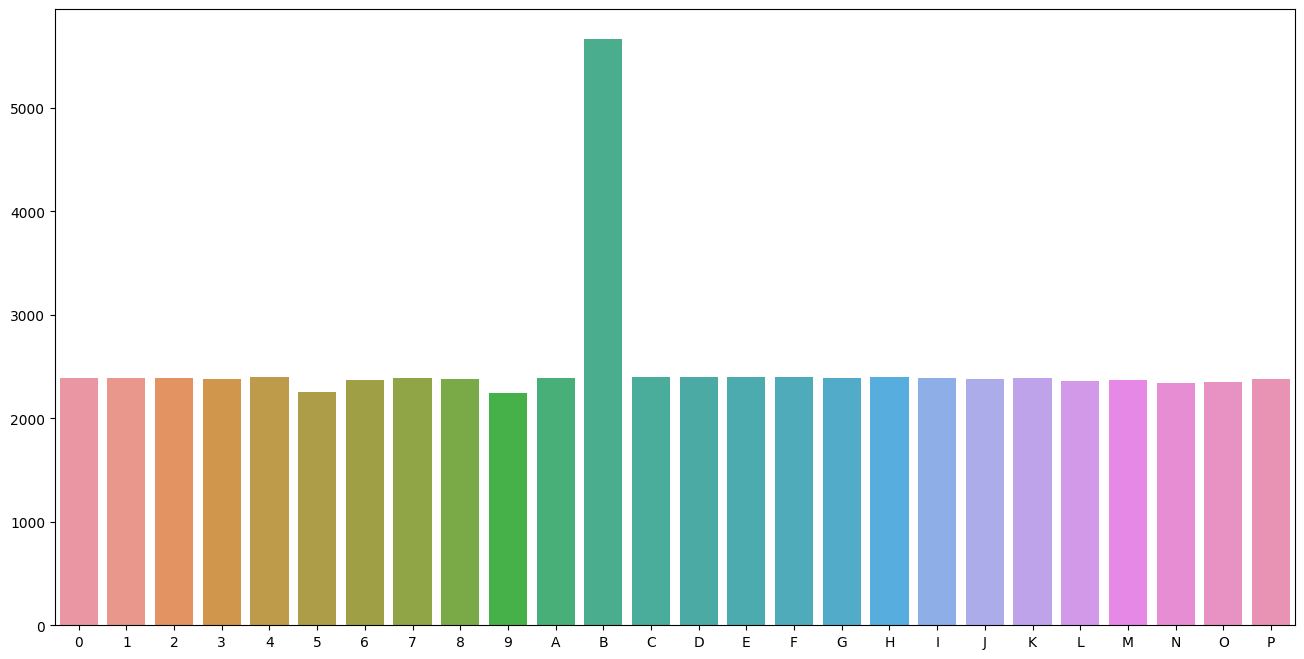

In [6]:
# Show distributions
plt.figure(figsize=(16, 8)) 
# plt.subplot(1,2,1)
unique_bar(y_train, by_merge_map)

Print 10 random pictures

In [7]:
no = 0
last = len(x_train)
for i, x in enumerate(x_train):
    if i%1000 == 0:print(f'{i}/{last}')

    x_train[i]= fix_image(x_train[i], 2).reshape(28,28)
    
    
    # if no == 5: break
# x_train = x_train2.reshape(no, 28,28)

0/65017
1000/65017
2000/65017
3000/65017
4000/65017
5000/65017
6000/65017
7000/65017
8000/65017
9000/65017
10000/65017
11000/65017
12000/65017
13000/65017
14000/65017
15000/65017
16000/65017
17000/65017
18000/65017
19000/65017
20000/65017
21000/65017
22000/65017
23000/65017
24000/65017
25000/65017
26000/65017
27000/65017
28000/65017
29000/65017
30000/65017
31000/65017
32000/65017
33000/65017
34000/65017
35000/65017
36000/65017
37000/65017
38000/65017
39000/65017
40000/65017
41000/65017
42000/65017
43000/65017
44000/65017
45000/65017
46000/65017
47000/65017
48000/65017
49000/65017
50000/65017
51000/65017
52000/65017
53000/65017
54000/65017
55000/65017
56000/65017
57000/65017
58000/65017
59000/65017
60000/65017
61000/65017
62000/65017
63000/65017
64000/65017
65000/65017


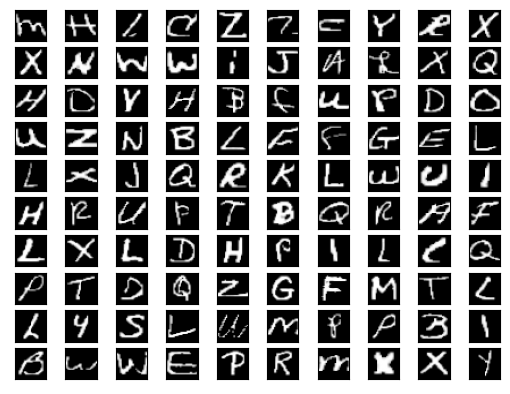

In [8]:
for i, r in enumerate(np.random.randint(0, len(x_train), 100)):
    
    plt.subplot(10,10,i+1)
    plt.imshow(x_train[r], cmap='gray')
    plt.xticks([]), plt.yticks([])

The mean picture of the training set

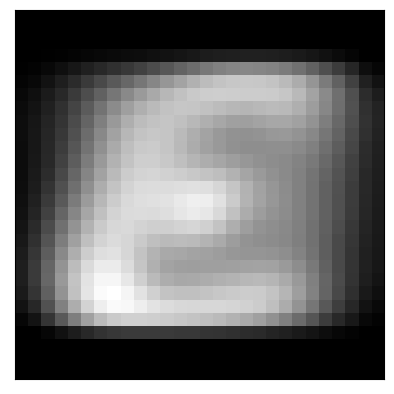

In [9]:
plt.xticks([]), plt.yticks([])
plt.imshow(np.mean(x_train, axis=0), cmap='gray')

### Modeling


Restore to oneliner

In [10]:
x_train = np.asarray(x_train.reshape(65017, 28* 28))

In [11]:
num_classes = len(np.unique(y_train))
# input_shape = (28, 28, 1)

# x_train = x_train
# x_train = x_train.astype("float32") / 255
# x_train = np.expand_dims(x_train, -1)

y_train = keras.utils.to_categorical(y_train.ravel(), num_classes)

In [16]:
from sklearn.model_selection import train_test_split

x_train1, x_test, y_train1, y_test = train_test_split(x_train, y_train, test_size=0.2, random_state=215)

<AxesSubplot: >

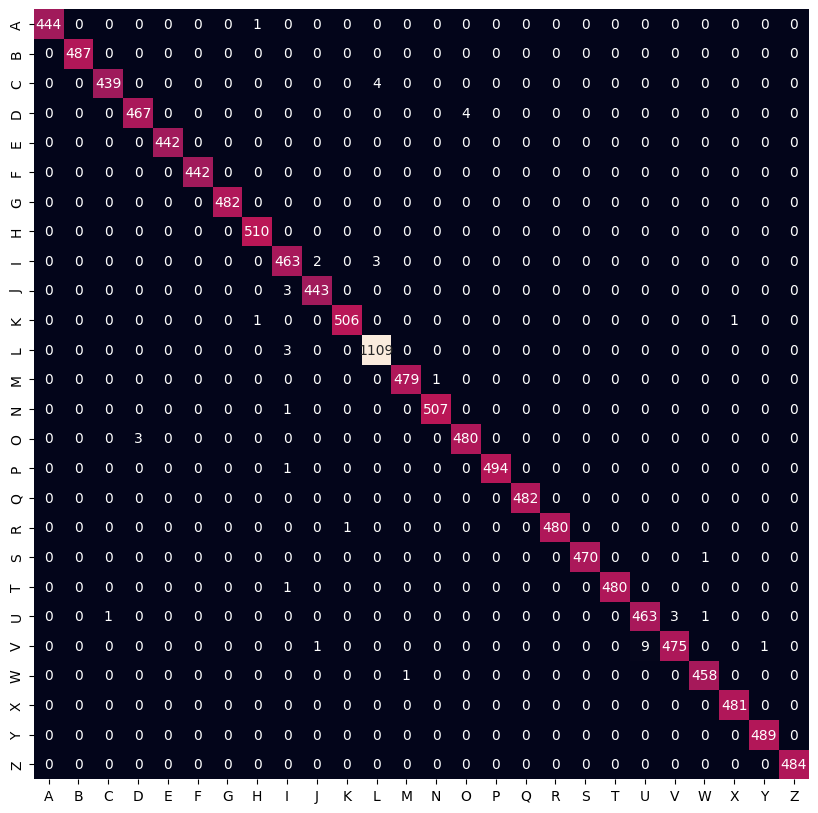

In [19]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
plt.figure(figsize=(10,10))
cm = confusion_matrix(np.argmax(y_test, axis=1), np.argmax(y_pred, axis=1))
sns.heatmap(cm, vmin=np.min(cm), vmax=np.max(cm), annot=True, cbar=False ,fmt='d', xticklabels=by_merge_map_new.values(), yticklabels=by_merge_map_new.values())

In [20]:
print(classification_report(np.argmax(y_test, axis=1), np.argmax(y_pred, axis=1),target_names=by_merge_map_new.values()))

              precision    recall  f1-score   support

           A       1.00      1.00      1.00       445
           B       1.00      1.00      1.00       487
           C       1.00      0.99      0.99       443
           D       0.99      0.99      0.99       471
           E       1.00      1.00      1.00       442
           F       1.00      1.00      1.00       442
           G       1.00      1.00      1.00       482
           H       1.00      1.00      1.00       510
           I       0.98      0.99      0.99       468
           J       0.99      0.99      0.99       446
           K       1.00      1.00      1.00       508
           L       0.99      1.00      1.00      1112
           M       1.00      1.00      1.00       480
           N       1.00      1.00      1.00       508
           O       0.99      0.99      0.99       483
           P       1.00      1.00      1.00       495
           Q       1.00      1.00      1.00       482
           R       1.00    